In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#DATA CLEANING

In [4]:
# data cleaning
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
# check the duplicate
data.duplicated().sum()

np.int64(24)

In [6]:
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
# check the summary statistics
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# show the frequency of unique values in the income column
data['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [9]:
# show the frequency of unique values in the age column
data['age'].value_counts()

,count
age,
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3


In [10]:
data = data.copy()

In [11]:
# clean the target variable
data['income'] = data['income'].str.lower()
data['income'].value_counts()

,count
income,
<=50k,24720
>50k,7841


In [12]:
# replace the income(target) values with 1 and 0, 0 : <=50k, 1: >50k
data['income'] = data['income'].replace({'<=50k': 0, '>50k': 1}).astype(int)
data['income'].value_counts()

/tmp/ipython-input-62962787.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace({'<=50k': 0, '>50k': 1}).astype(int)


,count
income,
0,24720
1,7841


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [14]:
# show workclass column with ?
data['workclass'].value_counts()

# change the ? to unknown
data['workclass'] = data['workclass'].replace('?', 'unknown')
data['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
unknown,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [15]:
# show workclass column with ?
data['occupation'].value_counts()

# change the ? to unknown
data['occupation'] = data['occupation'].replace('?', 'unknown')
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
unknown,1843
Transport-moving,1597


In [16]:
# drop the unknown in the entire data
data = data[(data['workclass'] != 'unknown') & (data['occupation'] != 'unknown')]
data.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


# DATA VISUALIZATION

In [17]:
data = data.copy()

In [18]:
# select the numeric column for boxplot
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

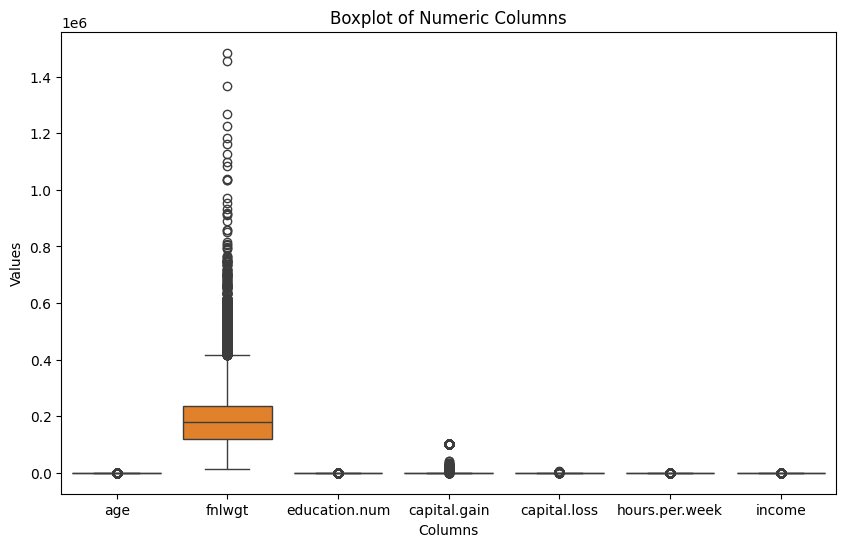

In [19]:
# create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

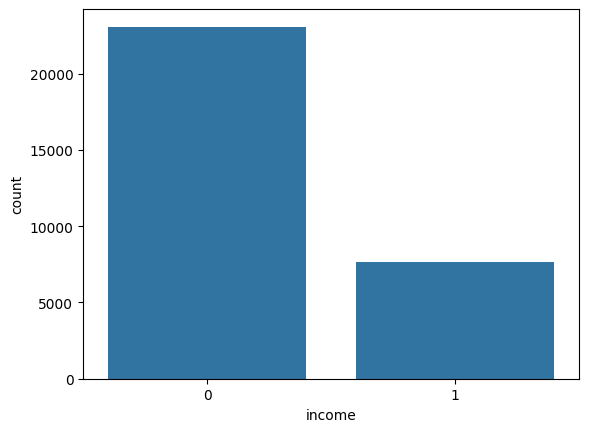

In [20]:
# graphic visualisation of the income
sns.countplot(data=data,x='income')
plt.show()

In [21]:
def plot_barchart(data):
    """
    plots showing the race,worlclass,occupation and education distributiom
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes = axes.flatten()

    # Race (horizontal bar chart)
    data.groupby('race').size().plot(
        kind='barh',
        color=sns.palettes.mpl_palette('Dark2'),
        ax=axes[0]
    )
    axes[0].set_title("Counts by Race")
    axes[0].spines[['top', 'right']].set_visible(False)

    # Workclass
    data.groupby('workclass').size().plot(
        kind='bar',
        color=sns.palettes.mpl_palette('Dark2'),
        ax=axes[1]
    )
    axes[1].set_title("Counts by Workclass")
    axes[1].spines[['top', 'right']].set_visible(False)
    axes[1].tick_params(axis='x', rotation=45)

    # Occupation
    data.groupby('occupation').size().plot(
        kind='bar',
        color=sns.palettes.mpl_palette('Dark2'),
        ax=axes[2]
    )
    axes[2].set_title("Counts by Occupation")
    axes[2].spines[['top', 'right']].set_visible(False)
    axes[2].tick_params(axis='x', rotation=45)

    # Education
    data.groupby('education').size().plot(
        kind='bar',
        color=sns.palettes.mpl_palette('Dark2'),
        ax=axes[3]
    )
    axes[3].set_title("Counts by Education")
    axes[3].spines[['top', 'right']].set_visible(False)
    axes[3].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


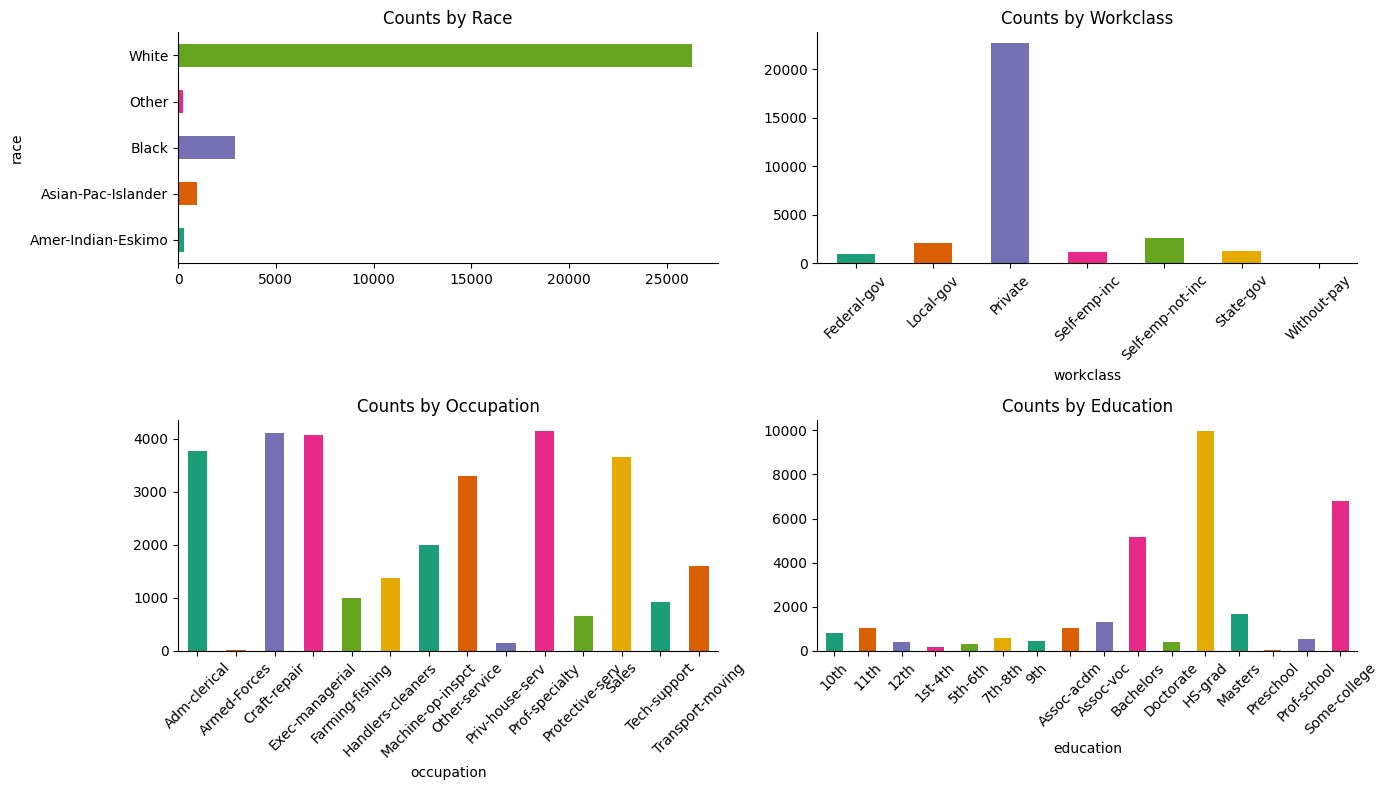

In [22]:
plot_barchart(data)

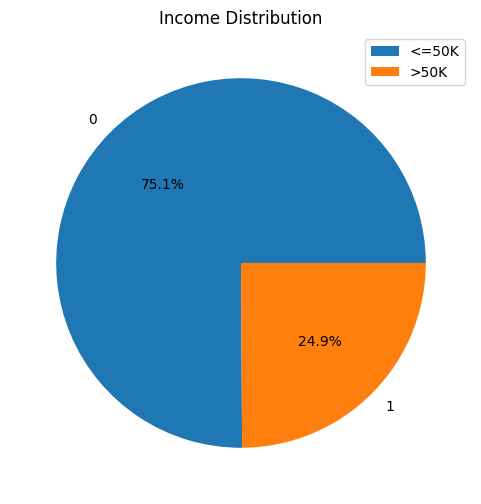

In [23]:
# Plot a pie chart showing the distribution of income categories with Dark2 palette,
# display percentages on slices, and add a legend for '<=50K' and '>50K'
data.groupby('income').size().plot(kind='pie',figsize=(6,6), color=sns.palettes.mpl_palette('Dark2'), autopct='%1.1f%%')
plt.title('Income Distribution')
plt.legend(['<=50K', '>50K'])
plt.show()

# SUPPORT VECTOR MACHINE

In [24]:
data = data.copy()

In [25]:
# Assign the dataset to X and y
X = data.drop('income', axis=1)
y = data['income']

In [26]:
# split the train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# split into categorical and numerical variable in X
categorical_column = X.select_dtypes(include=['object']).columns
numerical_column = X.select_dtypes(include=['int64', 'float64']).columns

In [28]:
# Assign the OneHotEncoder to the X train and X test categories
encoded = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_train_categories = encoded.fit_transform(X_train[categorical_column])
X_test_categories = encoded.transform(X_test[categorical_column])

In [29]:
# Assign Standardization to the X train and X test numerics
scaled_code = StandardScaler()
X_train_numerical = scaled_code.fit_transform(X_train[numerical_column])
X_test_numerical = scaled_code.transform(X_test[numerical_column])

In [30]:
# Combine the X test and X trained of both variables together
X_train_new = np.concatenate((X_train_categories, X_train_numerical), axis=1)
X_test_new = np.concatenate((X_test_categories, X_test_numerical), axis=1)

In [31]:
# Implement SMOTE to balance the data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_os, y_train_os = os.fit_resample(X_train_new, y_train)

In [32]:
# Apply the SVM model
svc_model = SVC(kernel='rbf', C=5, probability=True, class_weight='balanced')
svc_model.fit(X_train_os, y_train_os)

SVC(C=5, class_weight='balanced', probability=True)

In [33]:
y_pred = svc_model.predict(X_test_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# check for the score accuracy of the model
accuracy_score(y_test, y_pred)

0.8185221354166666

In [35]:
# print the classification of the SVM model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4639
           1       0.59      0.82      0.69      1505

    accuracy                           0.82      6144
   macro avg       0.76      0.82      0.78      6144
weighted avg       0.85      0.82      0.83      6144



In [36]:
# evaluation of the SVM model using confusion maxtrix
print(confusion_matrix(y_test,y_pred))

[[3788  851]
 [ 264 1241]]


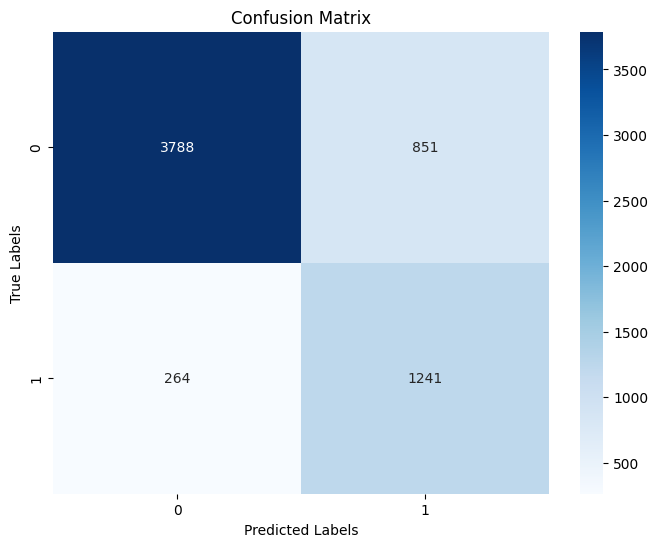

In [37]:
# display the svm plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## DECISION TREE MODEL
Decision trees can be applied to both regression and classification problems. Decision trees is implemented to compare the scores with the SVM model

In [38]:
# apply the decision tree model to the selected data
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train_os, y_train_os)

DecisionTreeClassifier()

In [39]:
y_pred_decision = decision_model.predict(X_test_new)
y_pred_decision

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# check for the score accuracy of the decision tree model
accuracy_score(y_test, y_pred_decision)

0.8077799479166666

In [41]:
# print the classification of the decision tree model
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4639
           1       0.60      0.67      0.63      1505

    accuracy                           0.81      6144
   macro avg       0.74      0.76      0.75      6144
weighted avg       0.82      0.81      0.81      6144



# RANDOM FOREST


In [42]:
# apply the Random forest classifier model to the selected data
random_forest_model = RandomForestClassifier(n_estimators=200)
random_forest_model.fit(X_train_os, y_train_os)

RandomForestClassifier(n_estimators=200)

In [43]:
y_pred_random = random_forest_model.predict(X_test_new)

In [44]:
# check for the score accuracy of the random forest model
accuracy_score(y_test, y_pred_random)

0.845703125

In [45]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4639
           1       0.68      0.70      0.69      1505

    accuracy                           0.85      6144
   macro avg       0.79      0.80      0.79      6144
weighted avg       0.85      0.85      0.85      6144



In [46]:
print(confusion_matrix(y_test,y_pred_random))


[[4149  490]
 [ 458 1047]]


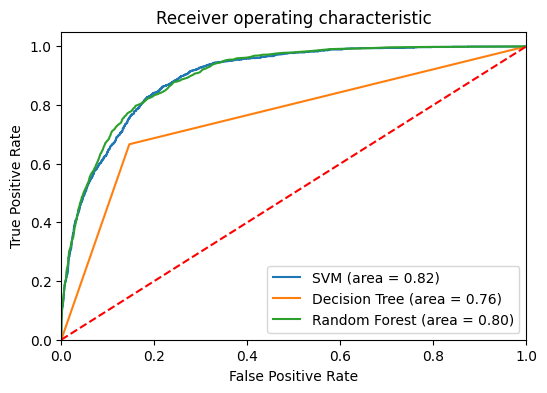

In [47]:
# roc curve for SVM
svm_roc_auc = roc_auc_score(y_test, y_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svc_model.predict_proba(X_test_new)[:,1])

# roc curve for decision tree
decision_roc_auc = roc_auc_score(y_test, y_pred_decision)
decision_fpr, decision_tpr, decision_thresholds = roc_curve(y_test,
 decision_model.predict_proba(X_test_new)[:,1])

# roc curve for random forest
random_roc_auc = roc_auc_score(y_test, y_pred_random)
random_fpr, random_tpr, random_thresholds = roc_curve(y_test,
 random_forest_model.predict_proba(X_test_new)[:,1]
)

# Plot the graph
plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot(decision_fpr, decision_tpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)
plt.plot(random_fpr, random_tpr, label='Random Forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()